In [2]:
%matplotlib notebook
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import sys

sys.path.append('../')
data_path = '../data/raw/'

In [3]:
data = pd.read_csv(data_path + 'train_1.csv', header=0, delimiter=";",decimal=',',
                    parse_dates=['date'], index_col='date')
data = data.drop(['insee', 'ech', 'mois'], axis=1)

In [4]:
data.columns.values

array(['tH2_obs', 'capeinsSOL0', 'ciwcH20', 'clwcH20', 'ddH10_rose4',
       'ffH10', 'flir1SOL0', 'fllat1SOL0', 'flsen1SOL0', 'flvis1SOL0',
       'hcoulimSOL0', 'huH2', 'iwcSOL0', 'nbSOL0_HMoy', 'nH20',
       'ntSOL0_HMoy', 'pMER0', 'rr1SOL0', 'rrH20', 'tH2',
       'tH2_VGrad_2.100', 'tH2_XGrad', 'tH2_YGrad', 'tpwHPA850', 'ux1H10',
       'vapcSOL0', 'vx1H10'], dtype=object)

# Correlation between variables 

<IPython.core.display.Javascript object>


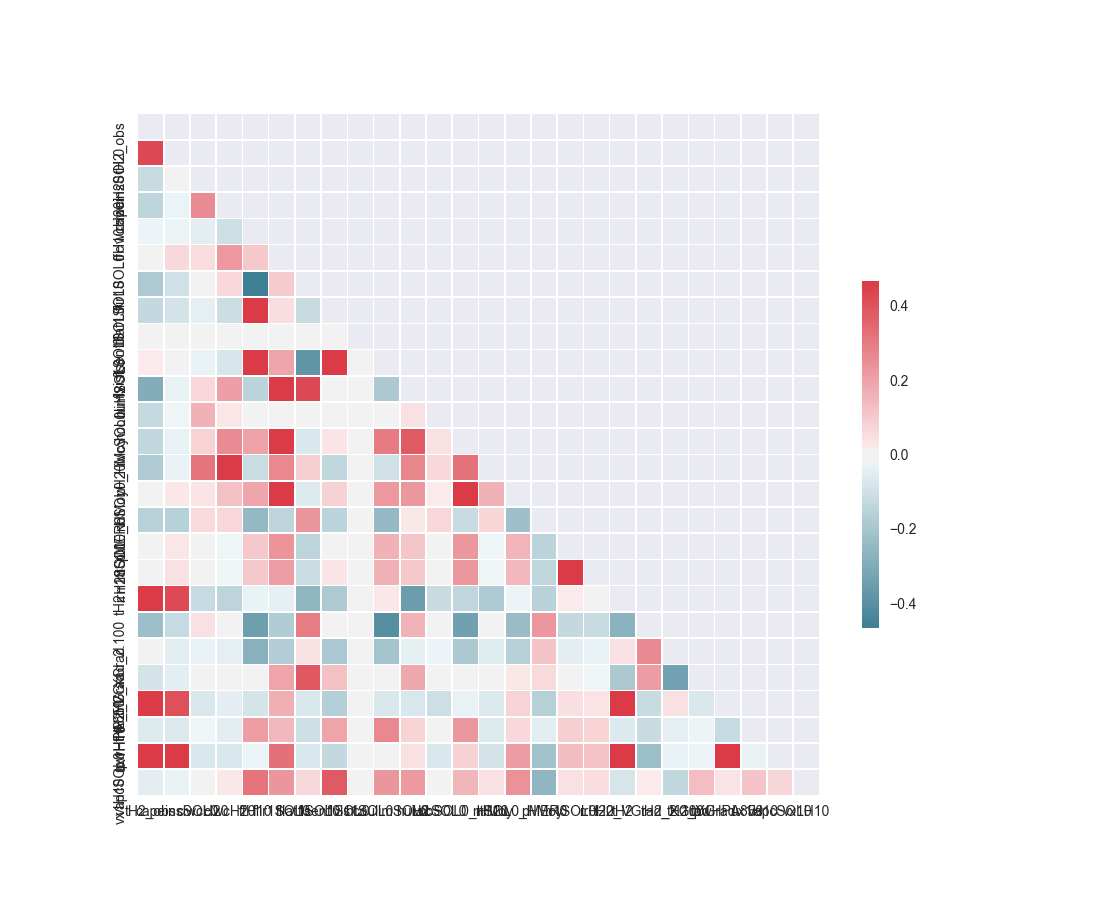

In [5]:
corr = data.corr()

#Mask upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sb.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sb.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})